# Challenge: Classification using Machine Learning

## Author: Diego Halabi

## Data description

| variable | type          | definition                                    |
|----------|---------------|-----------------------------------------------|
| default  | Binary        | Classify if the client acquired a debt or not |
| income   | Float/Integer | Income declared by the client                 |
| balance  | Float/Integer | Total balance in the credit account           |
| student  | Binary        | Classify if the client is a student or not    |

## Workspace preparation

In [59]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

In [31]:
# load data

df = pd.read_csv('default_credit.csv')
df = df.drop(['index'], axis = 1)
print(df.shape)
df.head()

(10000, 4)


,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


## Exploratory Data Analysis

### A boxplot of the total account balance, segmented by student status
Students have a higher balance than non-students.

<AxesSubplot:xlabel='student', ylabel='balance'>

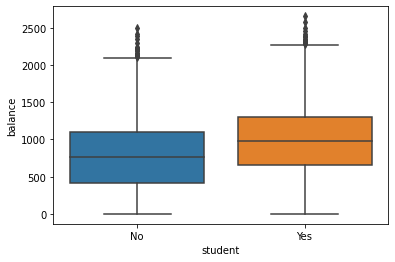

In [32]:
sns.boxplot(x = 'student', y = 'balance', data = df)

### A boxplot of each customer's total income, segmented by student status
Students have a higher income than non-students.

<AxesSubplot:xlabel='student', ylabel='income'>

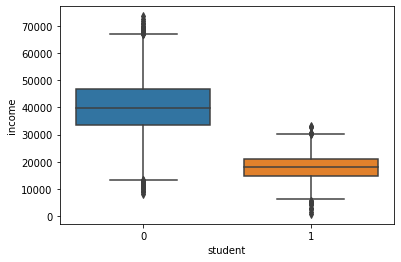

In [68]:
sns.boxplot(x = 'student', y = 'income', data = df)

### A boxplot of the total account balance, segmented by default status
Those who entered with debt, have greater delinquency (balance).

<AxesSubplot:xlabel='default', ylabel='balance'>

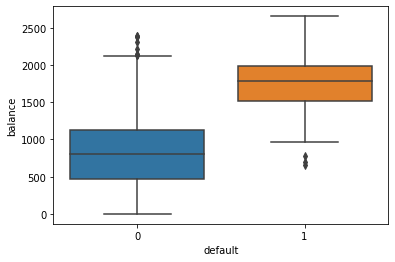

In [69]:
sns.boxplot(x = 'default', y = 'balance', data = df)

### A boxplot of each customer's total revenue, segmented by default status.
No differences are observed in the income of those who entered with debt and those who did not.

<AxesSubplot:xlabel='default', ylabel='income'>

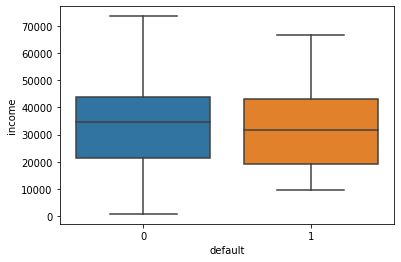

In [70]:
sns.boxplot(x = 'default', y = 'income', data = df)

### A scatterplot between balance and income, segmented by student status

There is no relationship between balance and income, separated by students or non-students.

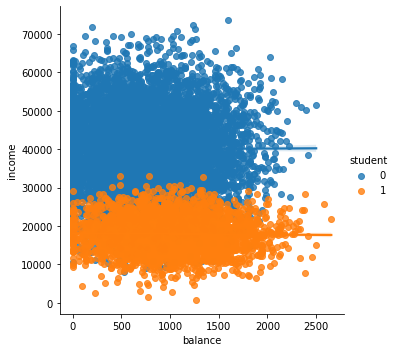

In [71]:
sns.lmplot('balance', 'income', df, hue = 'student')

### A scatterplot between balance and income, segmented by default status.
An inverse relationship is observed between balance and income, separated by income status.

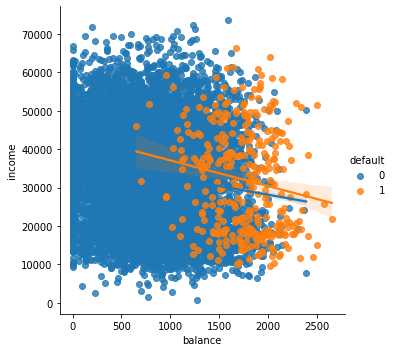

In [72]:
sns.lmplot('balance', 'income', df, hue = 'default')

## Exploratory analysis

### Recode variables
First, we need to recode categorical variables to dummy variables.

In [33]:
df['student'] = np.where(df['student'] == 'Yes', 1, 0)
df['default'] = np.where(df['default'] == 'Yes', 1, 0)

### Exploratory model

Now we can implement a model to predict the `'default'` variable.

$
log (\frac{pr = (default = 1)} {1 - pr (default = 1)}) = \beta_{0} + \beta_{1} \cdot balance + \beta_{2} \cdot income + \beta_{3} \cdot student
$

In [34]:
model_0 = smf.logit('default ~ balance + income + student', data = df).fit()
model_0.summary()

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Sun, 15 May 2022   Pseudo R-squ.:                  0.4619
Time:                        18:13:53   Log-Likelihood:                -785.77
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                3.257e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.8690      0.492    -22.079      0.000     -11.834      -9.904
balance        0.0057      0.000     24.737      0.000       0.005       0.006
income      3.033e-06    8.2e-06      0.370      0.712    -1.3e-05    1.91e-05
student       -0.6468      0.236     -2.738      0.006      -1.110      -0.184
==============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [35]:
# Depure the model

depure_model_0 = smf.logit('default ~ balance + student', data = df).fit()
depure_model_0.summary()

Optimization terminated successfully.
         Current function value: 0.078584
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Sun, 15 May 2022   Pseudo R-squ.:                  0.4619
Time:                        18:13:55   Log-Likelihood:                -785.84
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                1.189e-293
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.7495      0.369    -29.115      0.000     -11.473     -10.026
balance        0.0057      0.000     24.748      0.000       0.005       0.006
student       -0.7149      0.148     -4.846      0.000      -1.004      -0.426
==============================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Here, we can see that the balance in the credit card is directly related to the probability of being in debt (`'default'`). Students are in inverse relation to the probability of being in debt.

## Model training

In [39]:
# Split data into train and test

x_train_pre, x_test_pre, y_train, y_test = train_test_split(df.loc[:,['balance', 'student']], df['default'], test_size = 0.33, random_state = 42)

In [40]:
# Data normalization
# Only for the training data.

x_train = StandardScaler().fit_transform(x_train_pre)
x_test = StandardScaler().fit_transform(x_test_pre)

In [45]:
# Train the model without alter the hyperparameters

default_model = LogisticRegression().fit(x_train, y_train)

## Model prediction assessment

### Accuracy and recall

* Accuracy: measures the fraction of correct predictions among those classified as positive. High values indicate that the model predicts more relevant outcomes than irrelevant ones. That is, it answers the question; what proportion of positive classifications were correct?.

* Recall (or sensitivity): measures the fraction of true positives predicted by the model. High values mean that the algorithm predict most of the relevant results. That is, it answers the question; what proportion of real positives was correctly classified?

In [46]:
yhat = default_model.predict(x_test)
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3190
           1       0.72      0.30      0.42       110

    accuracy                           0.97      3300
   macro avg       0.85      0.65      0.70      3300
weighted avg       0.97      0.97      0.97      3300



### Confusion matrix

In [49]:
m1_confusion_matrix = confusion_matrix(y_test, yhat)
m1_confusion_matrix

array([[3177,   13],
       [  77,   33]])

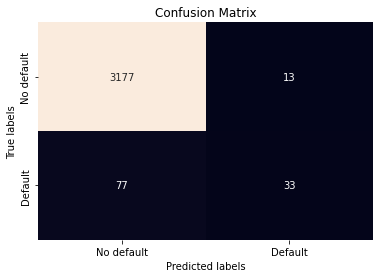

In [57]:
# plot confussion matrix, for vissualization check purpose

ax = plt.subplot()
sns.heatmap(m1_confusion_matrix, annot = True, ax = ax, fmt = 'g', cbar = False)

# aesthetics
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['No default', 'Default']);
ax.yaxis.set_ticklabels(['No default', 'Default']);

In [58]:
print('Precision of the model: ', m1_confusion_matrix[1,1]/(m1_confusion_matrix[1,1] + m1_confusion_matrix[0,1]))
print('Accuracy of the model: ', (m1_confusion_matrix[0,0] + m1_confusion_matrix[1,1])/m1_confusion_matrix.sum())
print('Recall of the model: ', m1_confusion_matrix[1,1]/(m1_confusion_matrix[1,1] + m1_confusion_matrix[1,0]))


Precision of the model:  0.717391304347826
Accuracy of the model:  0.9727272727272728
Recall of the model:  0.3


### Plot the Receiver Operator Characteristic (ROC) curve.

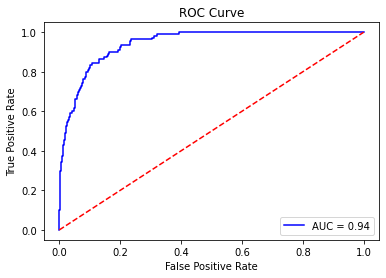

In [63]:
yhat = default_model.predict_proba(x_test)[:, 1]
false_positive, true_positive, threshold = roc_curve(y_test, yhat)
plt.title('ROC Curve')
plt.plot(false_positive, true_positive, 'b', label = 'AUC = %0.2f' % roc_auc_score(y_test, yhat))
plt.plot([0, 1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')

In [67]:
print('We have a very good area under the curve: ', roc_auc_score(y_test, yhat))

We have a very good area under the curve:  0.9426189797663151
